<a href="https://colab.research.google.com/github/Marouene-Oueslati/Notebooks_DL-AI-TensorFlow-Developer-Professional-Certificate/blob/master/Exercise_4_Question_Happy%20or%20sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [ ]:
import tensorflow as tf
import os
import zipfile


!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()


#callback
DESIRED_ACCURACY = 0.999
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.5 % accuracy so cancelling training!")
      self.model.stop_training = True
    
callbacks = myCallback()

--2021-02-11 16:10:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.13.80, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2021-02-11 16:10:43 (221 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [ ]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [ ]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-17.png', 'happy1-09.png', 'happy2-16.png', 'happy2-04.png', 'happy2-12.png', 'happy2-03.png', 'happy2-00.png', 'happy2-18.png', 'happy1-16.png', 'happy1-14.png']
['sad2-14.png', 'sad2-00.png', 'sad1-18.png', 'sad2-02.png', 'sad2-15.png', 'sad2-12.png', 'sad2-01.png', 'sad1-03.png', 'sad2-04.png', 'sad1-13.png']


In [ ]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(10, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(20, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
# Flatten the results to feed into a DNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 5)       140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5780)              0

In [ ]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s/',
    target_size= (150,150),
    #batch_size = 1, #SGD
    class_mode = 'binary')

        # Your Code Here)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [ ]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(train_generator,steps_per_epoch=1,epochs=20, verbose=1, )#callbacks=[callbacks])
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
1/1 [==============================] - 7s 7s/step - loss: 0.6956 - accuracy: 0.3438
Epoch 2/20
1/1 [==============================] - 0s 135ms/step - loss: 0.5879 - accuracy: 0.5625
Epoch 3/20
1/1 [==============================] - 0s 74ms/step - loss: 0.7847 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 37ms/step - loss: 0.5093 - accuracy: 0.8750
Epoch 5/20
1/1 [==============================] - 0s 69ms/step - loss: 0.3302 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 65ms/step - loss: 0.1916 - accuracy: 0.9688
Epoch 7/20
1/1 [==============================] - 0s 68ms/step - loss: 0.1582 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 66ms/step - loss: 0.2609 - accuracy: 0.9062
Epoch 9/20
1/1 [==============================] - 0s 61ms/step - loss: 0.1749 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 63ms/step - loss: 0.1015 - accuracy: 0.9688
Epoch 11/20
1/1 [=============

In [ ]:
# Let's Evaluate the Model

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "Sad")
  else:
    print(fn + " Happy")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


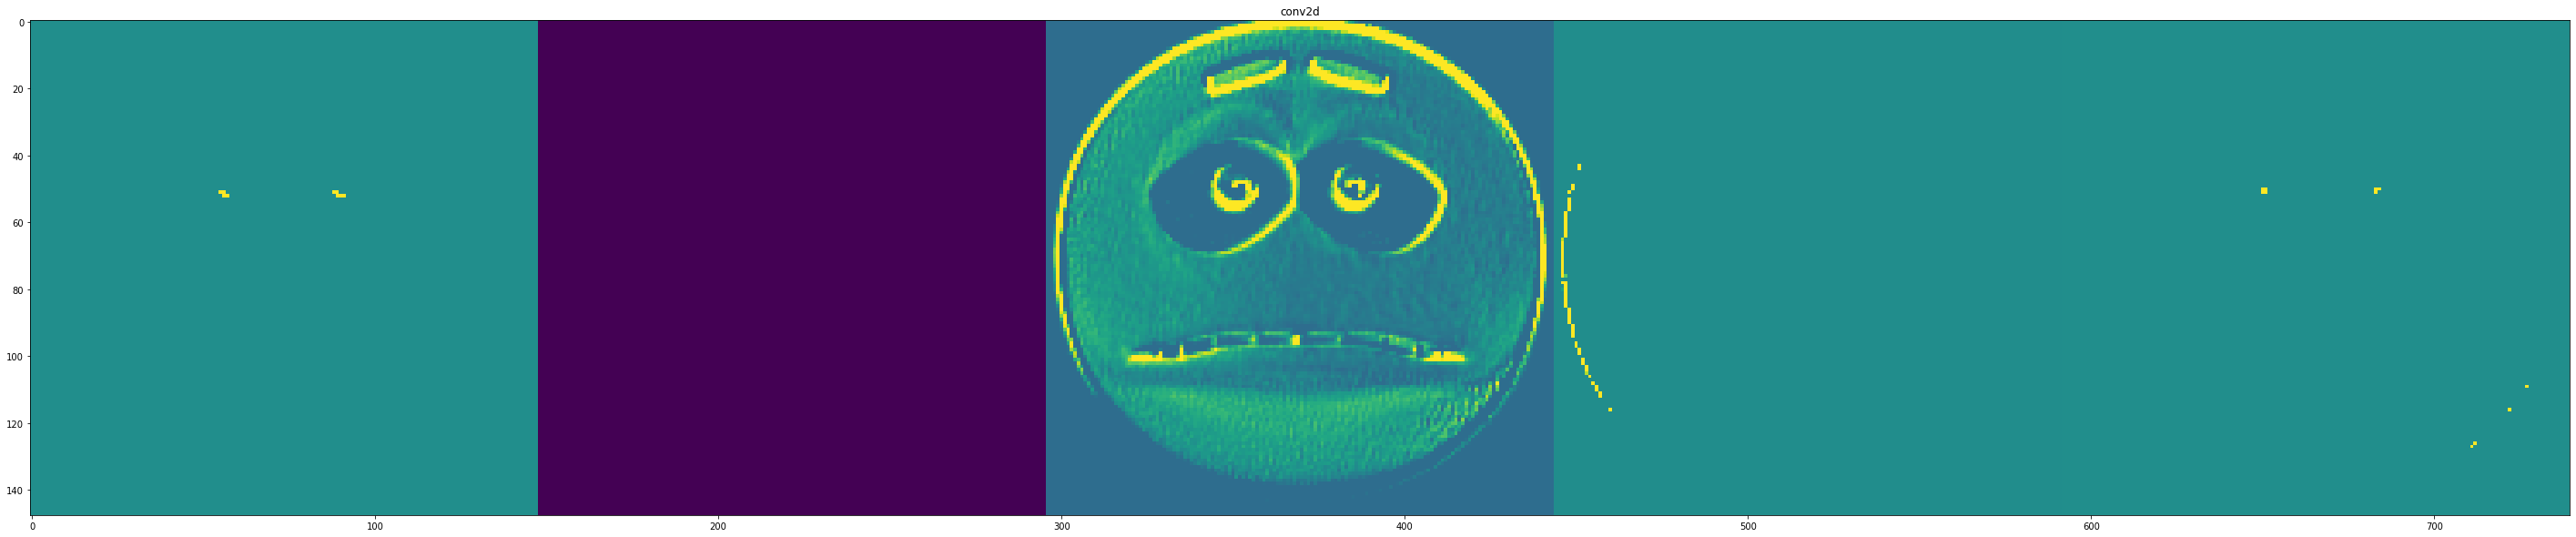

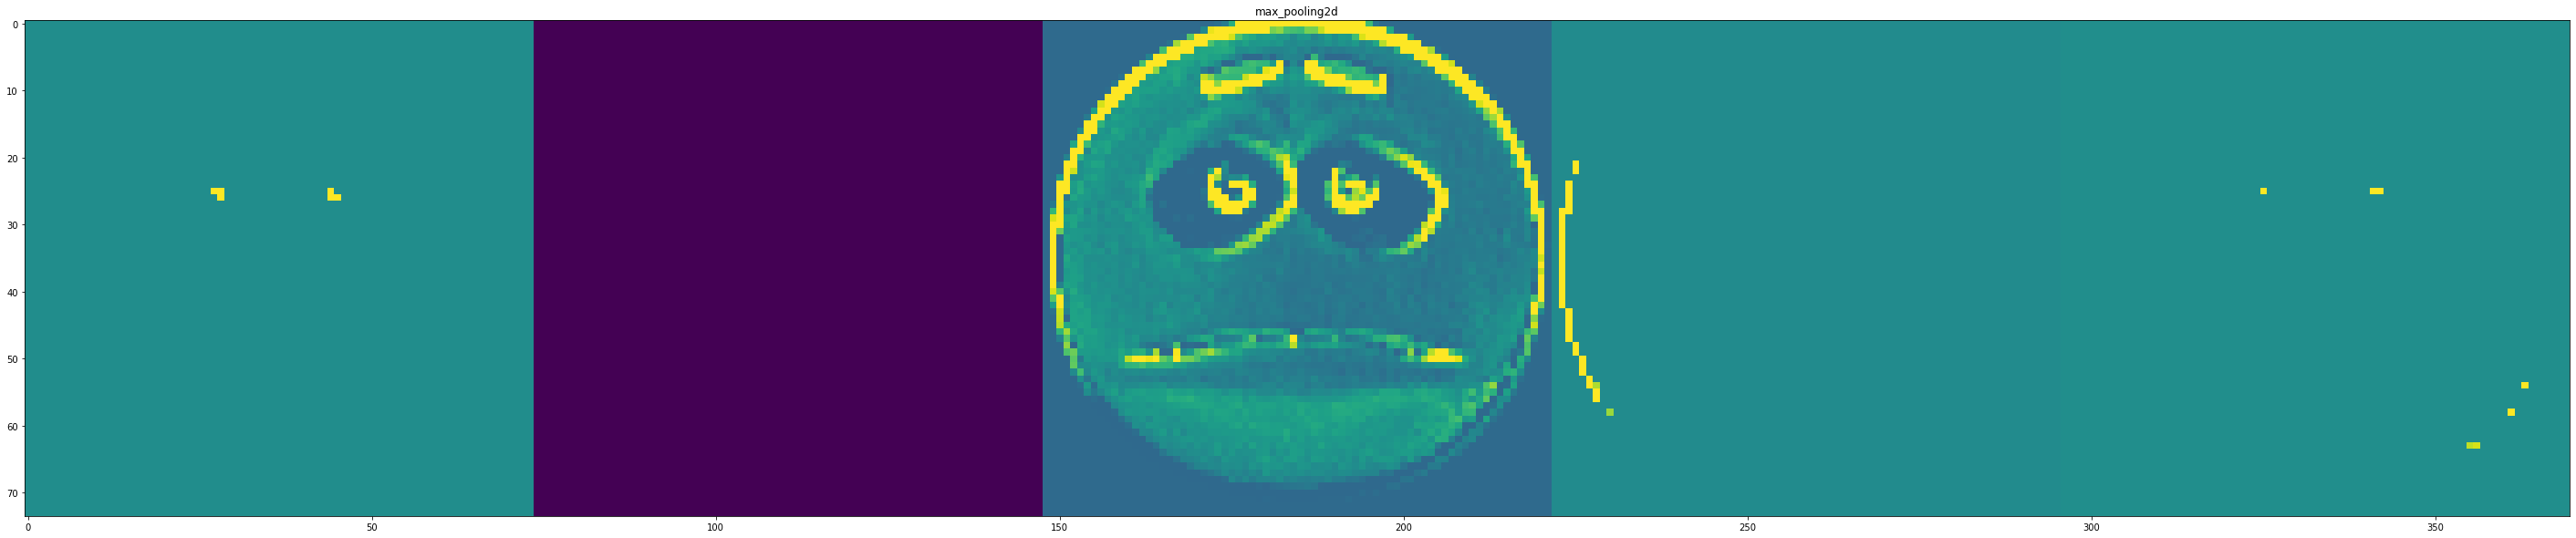

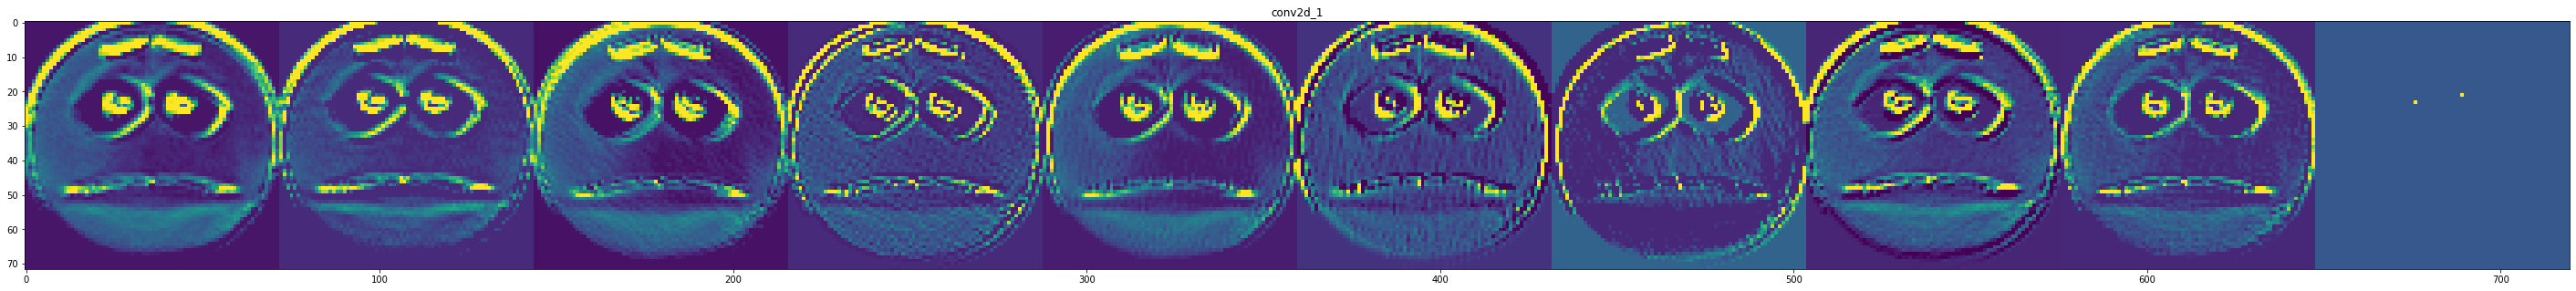

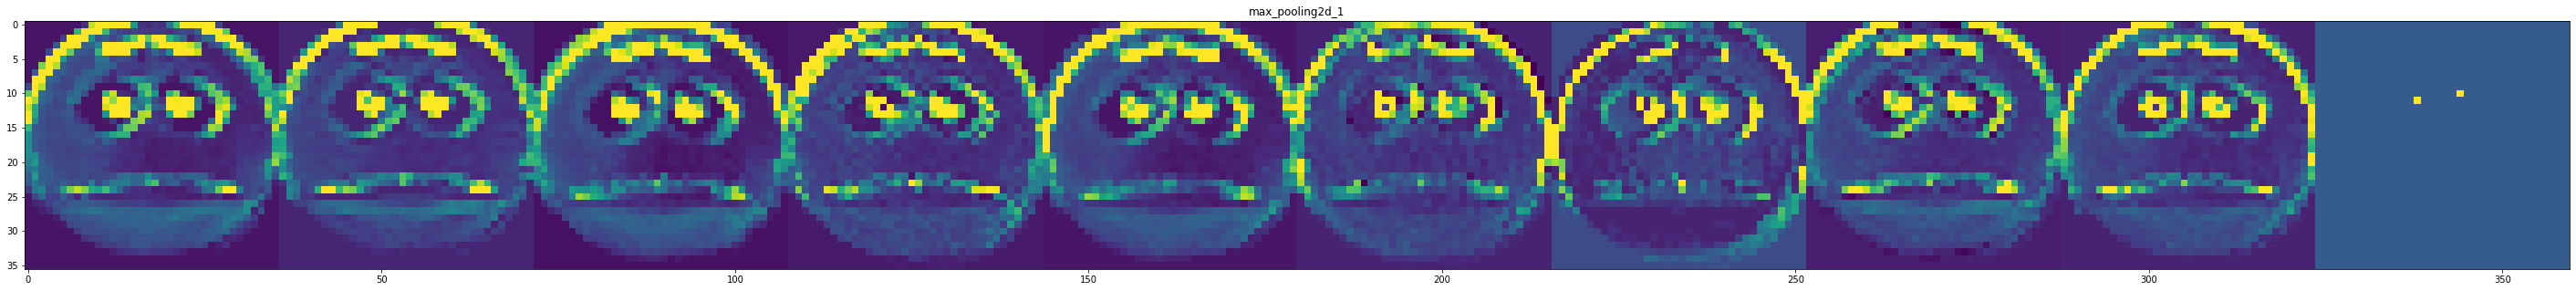

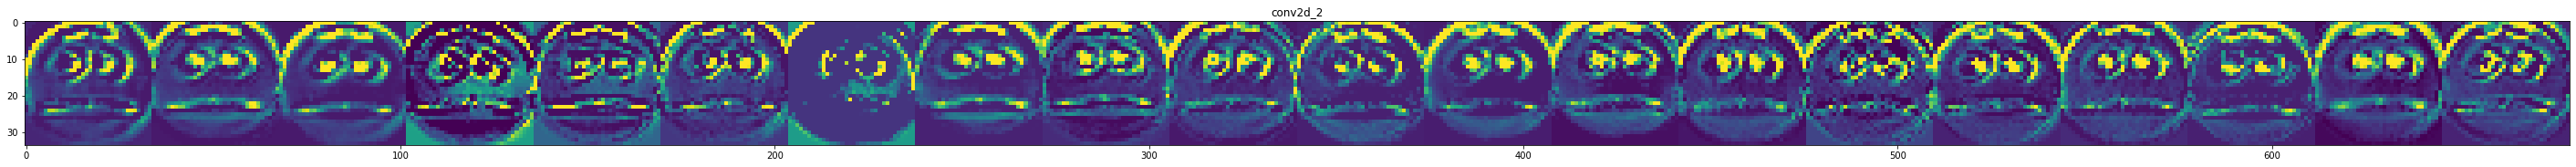

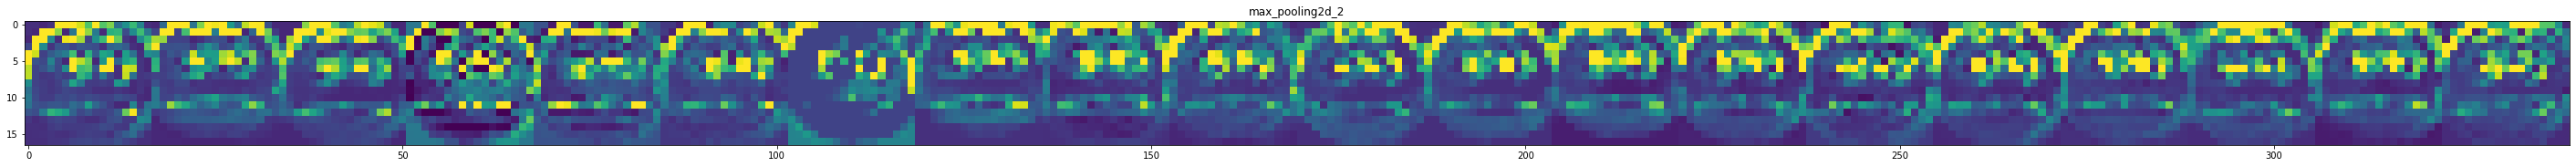

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[0:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
sad_img_files = [os.path.join(train_sad_dir, f) for f in train_sad_names]
happy_img_files = [os.path.join(train_happy_dir, f) for f in train_happy_names]
img_path = random.choice(sad_img_files + happy_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
#img.shape
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[0:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 50. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')